# Import libraries

In [67]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('darkgrid')

import os
from pathlib import Path

import pickle

from src.scenario import SimulationScenario
scenario = SimulationScenario(None, None, None)

# Load P-control datasets

In [2]:
# GET PATHS
root_path_P = './data/P_controller'

all_seeds_P = list(range(1, 10))
all_seeds_P = list(map(str, all_seeds_P))
print(all_seeds_P)

pathes_P = {}

for path in Path(root_path_P).iterdir():
    seed = str(path).split('seed_')[-1]
    if seed in all_seeds_P:
        pathes_P[seed] = path
display(pathes_P)

# LOAD IN ONE DATASET
total_costs_P = []

for seed in pathes_P:
    seed_obs_df = pd.read_csv(
        pathes_P[seed] / "clean_observations.csv", 
        index_col=0,
    )
    seed_obs_df.rename({'0': seed}, axis=1, inplace=True)
    seed_act_df = pd.read_csv(
        pathes_P[seed] / "actions.csv", 
        index_col=0,
    )
    seed_act_df.rename({'0': seed}, axis=1, inplace=True)
    
    seed_total_cost = scenario.compute_total_objective(
        seed_obs_df.values, 
        actions=seed_act_df.values,
    )
    total_costs_P.append(seed_total_cost)

total_costs_P = np.array(total_costs_P)
central_P = total_costs_P.mean()
stds = total_costs_P.std()
bottom_P = central_P - stds
top_P = central_P + stds

print(f'bottom_P = {bottom_P:.3f}')
print(f'central_P = {central_P:.3f}')
print(f'top_P = {top_P:.3f}')

['1', '2', '3', '4', '5', '6', '7', '8', '9']


{'3': PosixPath('data/P_controller/2024-03-27_122643_seed_3'),
 '4': PosixPath('data/P_controller/2024-03-27_122643_seed_4'),
 '5': PosixPath('data/P_controller/2024-03-27_122643_seed_5'),
 '2': PosixPath('data/P_controller/2024-03-27_122643_seed_2'),
 '7': PosixPath('data/P_controller/2024-03-27_122643_seed_7'),
 '9': PosixPath('data/P_controller/2024-03-27_122643_seed_9'),
 '8': PosixPath('data/P_controller/2024-03-27_122643_seed_8'),
 '1': PosixPath('data/P_controller/2024-03-27_122643_seed_1'),
 '6': PosixPath('data/P_controller/2024-03-27_122643_seed_6')}

bottom_P = 2.267
central_P = 2.643
top_P = 3.019


# Load RL-datasets

In [3]:
# GET PATHS
root_path = './data'

all_seeds = list(range(1, 15))
all_seeds = list(map(str, all_seeds))
print(all_seeds)

pathes = {}

for path in Path(root_path).iterdir():
    seed = str(path).split('seed_')[-1]
    if seed in all_seeds:
        pathes[seed] = path
display(pathes)


# LOAD IN ONE DATASET
learning_curves = []

for seed in pathes:
    seed_df = pd.read_csv(
        pathes[seed] / "learning curve.csv", 
        index_col=0,
    )
    seed_df.rename({'0': seed}, axis=1, inplace=True)
    learning_curves.append(seed_df)
    
learning_curves = pd.concat(learning_curves, axis=1)
learning_curves = learning_curves[all_seeds] # Sort columns
learning_curves.describe()

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']


{'8': PosixPath('data/2024-03-26_221635_seed_8'),
 '12': PosixPath('data/2024-03-26_221635_seed_12'),
 '7': PosixPath('data/2024-03-26_103819_seed_7'),
 '2': PosixPath('data/2024-03-26_103818_seed_2'),
 '9': PosixPath('data/2024-03-26_221635_seed_9'),
 '3': PosixPath('data/2024-03-26_103818_seed_3'),
 '6': PosixPath('data/2024-03-26_103819_seed_6'),
 '14': PosixPath('data/2024-03-26_221635_seed_14'),
 '13': PosixPath('data/2024-03-26_221635_seed_13'),
 '4': PosixPath('data/2024-03-26_103819_seed_4'),
 '11': PosixPath('data/2024-03-26_221635_seed_11'),
 '1': PosixPath('data/2024-03-26_103818_seed_1'),
 '10': PosixPath('data/2024-03-26_221635_seed_10'),
 '5': PosixPath('data/2024-03-26_103819_seed_5')}

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,170.000000,180.000000,128.000000,130.000000,154.000000,144.000000,140.000000
mean,3.509594,2.539125,3.242997,2.590975,2.992448,3.366597,2.526493,3.391079,2.955645,2.710314,2.965574,3.246221,3.215934,2.863288
std,2.815633,0.597689,1.464547,0.534131,0.839903,0.089173,0.517598,0.239056,0.693026,0.465440,0.501826,0.959116,0.540774,0.487915
min,2.029746,1.978085,1.947065,1.971402,1.944724,3.277720,1.981067,3.266646,1.932075,2.182950,2.085070,1.946155,2.080422,2.028644
25%,2.675513,2.061144,2.061144,2.151025,2.507207,3.318071,2.097617,3.305315,2.421382,2.325649,2.647388,2.771147,3.032706,2.458512
50%,3.046134,2.182604,2.770871,2.333226,2.826242,3.335576,2.270462,3.323746,3.119787,2.587139,2.985118,3.031158,3.308064,2.893346
75%,3.340841,3.155271,3.415613,3.171213,3.121285,3.364743,2.999093,3.364561,3.300191,2.967082,3.273189,3.275992,3.607460,3.114518
max,21.468832,4.741112,7.785267,3.769596,6.068163,3.722469,3.973656,5.476902,5.646765,4.659100,4.086982,8.236204,4.327940,3.996705


Let us drop "not-working" seeds

,2,4,7,8,10,11,14
count,300.000000,300.000000,300.000000,170.000000,128.000000,130.000000,140.000000
mean,2.539125,2.590975,2.526493,3.391079,2.710314,2.965574,2.863288
std,0.597689,0.534131,0.517598,0.239056,0.465440,0.501826,0.487915
min,1.978085,1.971402,1.981067,3.266646,2.182950,2.085070,2.028644
25%,2.061144,2.151025,2.097617,3.305315,2.325649,2.647388,2.458512
50%,2.182604,2.333226,2.270462,3.323746,2.587139,2.985118,2.893346
75%,3.155271,3.171213,2.999093,3.364561,2.967082,3.273189,3.114518
max,4.741112,3.769596,3.973656,5.476902,4.659100,4.086982,3.996705


Number of learning curves: 7


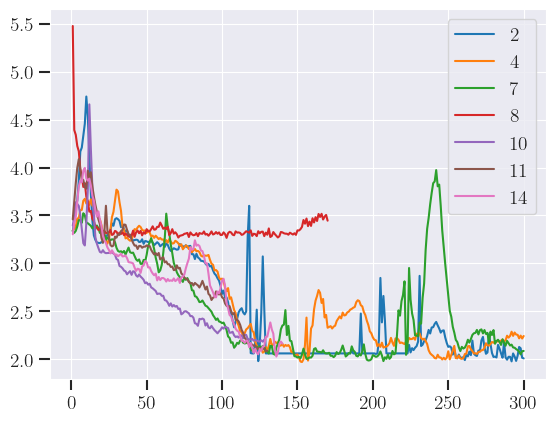

In [63]:
# seeds_to_drop = ['1', '3', '5', '6', '8', '9', '12']
seeds_to_drop = ['1', '3', '5', '6', '9', '12', '13']
learning_curves_selected = learning_curves.drop(seeds_to_drop, axis=1)
display(learning_curves_selected.describe())
learning_curves_selected.plot()
print(f'Number of learning curves: {learning_curves_selected.shape[1]}')

means


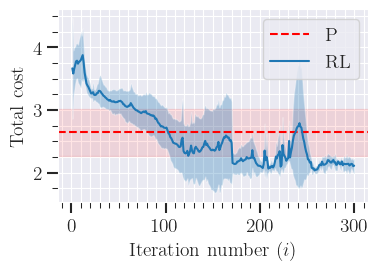

In [64]:
# sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx",
    "font.size": 14,
    "xtick.bottom" : True, 
    "ytick.left" : True,
    'xtick.major.size': 8,
    'xtick.major.width': 1.5,
    'xtick.minor.size': 4,
    'xtick.minor.width': 0.75,
    'ytick.major.size': 8,
    'ytick.major.width': 1.5,
    'ytick.minor.size': 4,
    'ytick.minor.width': 0.75,
})


def plot_total_cost(df, plot_type='means', savefig=False):
    if plot_type == 'means':
        central = df.mean(axis=1)
        stds = df.std(axis=1)
        bottom = central - stds
        top = central + stds
    elif plot_type == 'medians':
        central = df.median(axis=1)
        bottom = df.quantile(0.25, axis=1)
        top = df.quantile(0.75, axis=1)
    print(plot_type)
    
    fig, ax = plt.subplots(1, 1, figsize=(4,2.5))
    ax.set_ylabel("Total cost")
    ax.set_xlabel("Iteration number $(i)$")
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    
    plt.axhline(central_P, linestyle='--', color='r', label='P')
    plt.axhspan(bottom_P, top_P, alpha=0.1, color='r')
    
    central.plot(label='RL')
    plt.fill_between(central.index, bottom, top, alpha=0.3)
    
    plt.legend()
    
    # plt.tight_layout(pad=0.5)
    if savefig:
        plt.savefig("learning_curve.pdf", dpi=400)
    plt.show();

plot_total_cost(learning_curves_selected, savefig=False)
# plot_total_cost(learning_curves_selected, plot_type='medians', savefig=False)

means


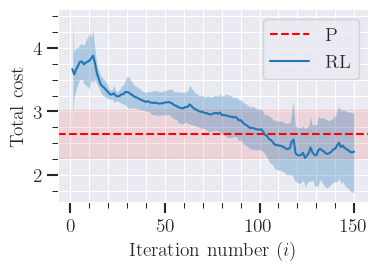

In [65]:
plot_total_cost(learning_curves_selected.iloc[:150], savefig=False)

means


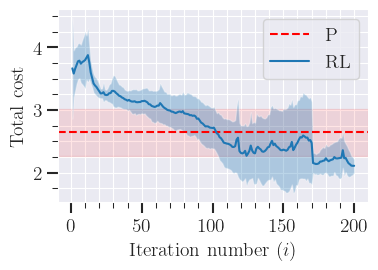

In [66]:
plot_total_cost(learning_curves_selected.iloc[:200], savefig=False)

# Plot actions and observations

In [113]:
# GET PATHS
root_path = './data'

all_seeds = list(range(1, 15))
all_seeds = list(map(str, all_seeds))
print(all_seeds)

pathes = {}

for path in Path(root_path).iterdir():
    seed = str(path).split('seed_')[-1]
    if seed in all_seeds:
        pathes[seed] = path
display(pathes)
    
    # seed_clean_obs_df = pd.read_csv(
    #     pathes_P[seed] / "clean_observations.csv", 
    #     index_col=0,
    # )
    # seed_clean_obs_df.rename({'0': seed}, axis=1, inplace=True)
    # clean_observations.append(seed_clean_obs_df)
    
    # seed_obs_df = pd.read_csv(
    #     pathes_P[seed] / "observations.csv", 
    #     index_col=0,
    # )
    # seed_obs_df.rename({'0': seed}, axis=1, inplace=True)
    # observations.append(seed_obs_df)
    
    # seed_act_df = pd.read_csv(
    #     pathes_P[seed] / "actions.csv", 
    #     index_col=0,
    # )
    # seed_act_df.rename({'0': seed}, axis=1, inplace=True)
    # actions.append(seed_act_df)


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']


{'8': PosixPath('data/2024-03-26_221635_seed_8'),
 '12': PosixPath('data/2024-03-26_221635_seed_12'),
 '7': PosixPath('data/2024-03-26_103819_seed_7'),
 '2': PosixPath('data/2024-03-26_103818_seed_2'),
 '9': PosixPath('data/2024-03-26_221635_seed_9'),
 '3': PosixPath('data/2024-03-26_103818_seed_3'),
 '6': PosixPath('data/2024-03-26_103819_seed_6'),
 '14': PosixPath('data/2024-03-26_221635_seed_14'),
 '13': PosixPath('data/2024-03-26_221635_seed_13'),
 '4': PosixPath('data/2024-03-26_103819_seed_4'),
 '11': PosixPath('data/2024-03-26_221635_seed_11'),
 '1': PosixPath('data/2024-03-26_103818_seed_1'),
 '10': PosixPath('data/2024-03-26_221635_seed_10'),
 '5': PosixPath('data/2024-03-26_103819_seed_5')}

Text(0.5, 0, '$\\tau$ [ms]')

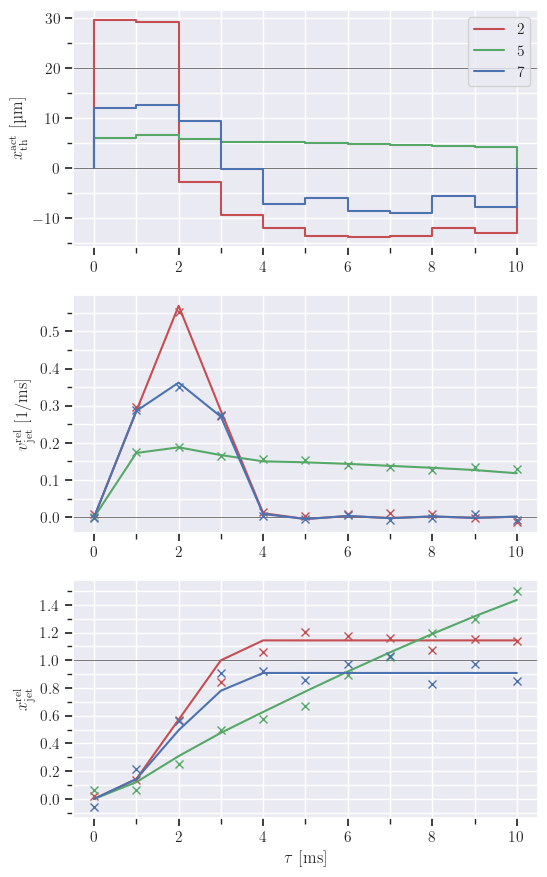

In [145]:
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx",
    "font.size": 10,
})

seeds_colors = {
    '2': 'r',
    '5': 'g',
    '7': 'b',
}

def plot_iteration_results()
# LOAD IN ONE DATASET
iteration = 150

seed_observations = {}
seed_clean_observations = {}
seed_actions = {}

for seed in seeds_colors:
    with open(pathes[seed] / "iteration_data.pkl", 'rb') as f:
        data = pickle.load(f)
    
    seed_clean_observations[seed] = data[iteration - 1]['clean_observations']
    seed_observations[seed] = data[iteration - 1]['observations']
    seed_actions[seed] = [0.]
    seed_actions[seed].extend(data[iteration - 1]['actions'][:-1])

fig, axes = plt.subplots(3, 1, figsize=(6,10.5),) # gridspec_kw={'height_ratios': [0.8, 1, 1, 1]})
    
# PLOT ACTIONS
ax = axes[0]

ax.axhline(0, color='black', linewidth=0.5, alpha=0.75)
ax.axhline(20, color='black', linewidth=0.5, alpha=0.75)
    
for seed in seeds_colors:
    real_actions = scenario.get_real_actions(seed_actions[seed])
    ax.plot(real_actions[:,0], real_actions[:,1], label=seed, color=seeds_colors[seed])
    
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(5))
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    
ax.set_ylabel(r"$x^\mathrm{act}_\mathrm{th}$ [µm]")
ax.set_xlabel("")

ax.legend(loc='upper right')

# PLOT JET VELOCITIES
ax = axes[1]

ax.axhline(0, color='black', linewidth=0.5, alpha=0.75)

for seed in seeds_colors:
    ax.plot(seed_clean_observations[seed][:,1], label=seed, color=seeds_colors[seed])
    ax.plot(seed_observations[seed][:,1], linestyle='', marker='x', color=seeds_colors[seed])
    
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
    
ax.set_ylabel(r"$v^\mathrm{rel}_\mathrm{jet}~[1/\mathrm{ms}]$")
ax.set_xlabel("")
    
    # ax.legend().set_visible(False)

# PLOT JET LENGTHS
ax = axes[2]

ax.axhline(1.0, color='black', linewidth=0.5, alpha=0.75)

for seed in seeds_colors:
    ax.plot(seed_clean_observations[seed][:,0], label=seed, color=seeds_colors[seed])
    ax.plot(seed_observations[seed][:,0], linestyle='', marker='x', color=seeds_colors[seed])

# for iter, ax in zip(iterations_lt, axes[2,:].flat):
    
#     ax.axhline(0, color='black', linewidth=0.5, alpha=0.75)
    
#     sns.lineplot(df, x='time', y=f'jet_velocity_{iter}', color='purple', ax=ax)
    
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
    
ax.set_ylabel(r"$x^\mathrm{rel}_\mathrm{jet}$")
ax.set_xlabel(r"$\tau$ [ms]")

plt.savefig("simulation_results.pdf", dpi=400)
# # axes[3,2].legend().set_visible(False)

# # Drop y-labels for inside plots
# for ax in axes[:,1:].flat:
#     ax.set_ylabel("")
# # Drop x-labels for obs-actions
# for ax in axes[1:-1,:].flat:
#     ax.set_xlabel("")
    
# axes[1,-1].yaxis.set_label_position("right")
# axes[1,-1].set_ylabel('action')

# axes[2,-1].yaxis.set_label_position("right")
# axes[2,-1].set_ylabel('relative\n jet velocity')

# axes[3,-1].yaxis.set_label_position("right")
# axes[3,-1].set_ylabel('relative\n jet length')

# plt.tight_layout(h_pad=0.1)
# plt.savefig("simulation_results.pdf", dpi=400)